## With Forest-Type (UCI dataset)

In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_crescent2D

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances: 500; Features: 2; Clusters: 2    2
dtype: int64
Instances 500 - Features 2 - Class 2
          0         1
0  0.288828 -0.821969
1  0.874078  0.035724
2  1.403953  0.265999
3  0.832238 -0.458342
4  0.769077 -0.364004


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


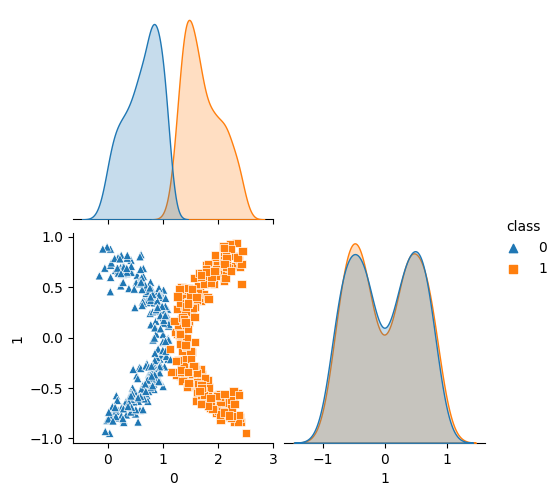

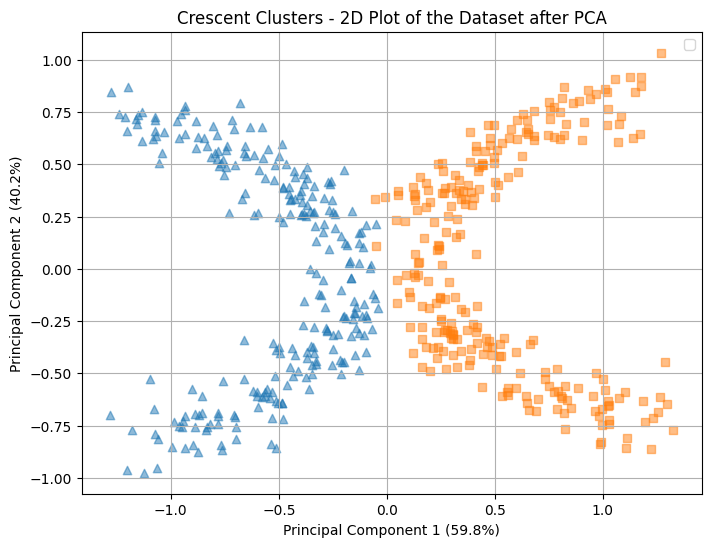

Instances: 500; Features: 2; Clusters: 2    2
dtype: int64


In [2]:
### Thyroid dataset
# fetch dataset 
df = load_crescent2D()

# data (as pandas dataframes) 
X = df.iloc[:, :-1]
y = pd.DataFrame(df.iloc[:, -1])
c = 2

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

markers = ['^', 's']
plotting(X, y, "Crescent Clusters", matrix_plot=True, markers=markers)
print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
# Normalization
# scaler = MinMaxScaler(feature_range=(0, 1))
# X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [244]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [111.70057702990488, 111.70057702990488, 111.70057702990488, 111.70057702990488, 111.70066263282857, 111.70066263282857, 111.70066263282857, 111.70066263282857, 111.70066263282857, 111.70066263282857]
ARI values: [0.7952536933251826, 0.7952536933251826, 0.7952536933251826, 0.7952536933251826, 0.7952536933251826, 0.7952536933251826, 0.7952536933251826, 0.7952536933251826, 0.7952536933251826, 0.7952536933251826]
NS values: [1.116912196674341, 1.116912196674341, 1.111939675018111, 1.116912196674341, 1.1169164592961756, 1.1119409572210792, 1.1169164592961756, 1.1119409572210792, 1.1169164592961756, 1.1169164592961756]
NMI values: [0.696897385164985, 0.696897385164985, 0.6968973851649851, 0.696897385164985, 0.696897385164985, 0.6968973851649851, 0.696897385164985, 0.6968973851649851, 0.696897385164985, 0.696897385164985]


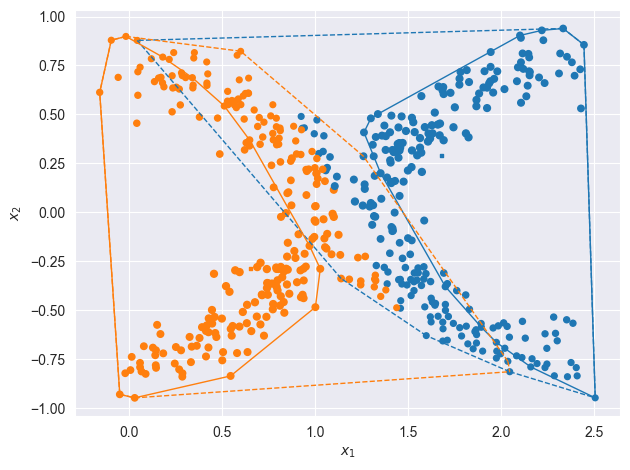

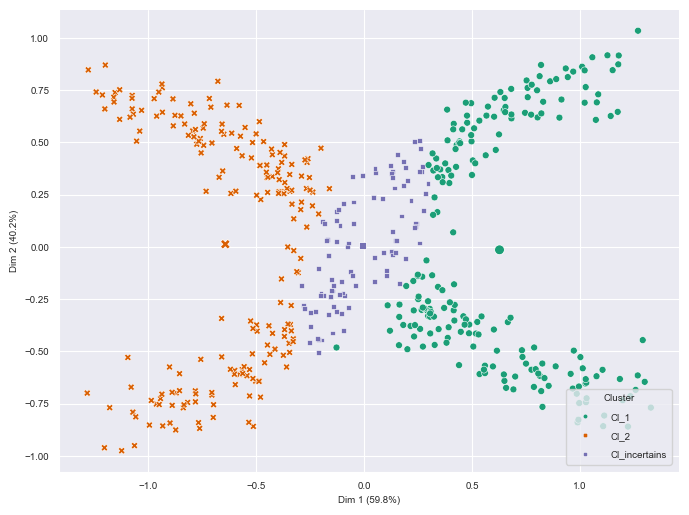

In [245]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [3]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, epsilon=1e-6)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [21.873579522709377, 21.873579522709377, 21.873579522709406, 21.873579522709406, 21.873579696128473, 21.873579696128473, 21.873579696128495, 21.873579696128495, 21.873579696128495, 21.873579696128495]
ARI values: [0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123]
NS values: [1.278604693261232, 1.278604693261232, 1.3158881983838109, 1.3158881983838109, 1.3158882662163265, 1.3158882662163265, 1.2786046300577376, 1.2786046300577376, 1.2786046300577376, 1.2786046300577376]
NMI values: [0.9530566686527555, 0.9530566686527555, 0.9530566686527554, 0.9530566686527554, 0.9530566686527554, 0.9530566686527554, 0.9530566686527555, 0.9530566686527555, 0.9530566686527555, 0.9530566686527555]


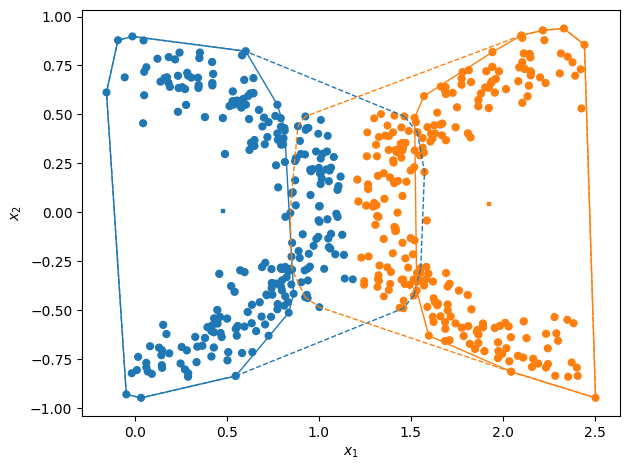

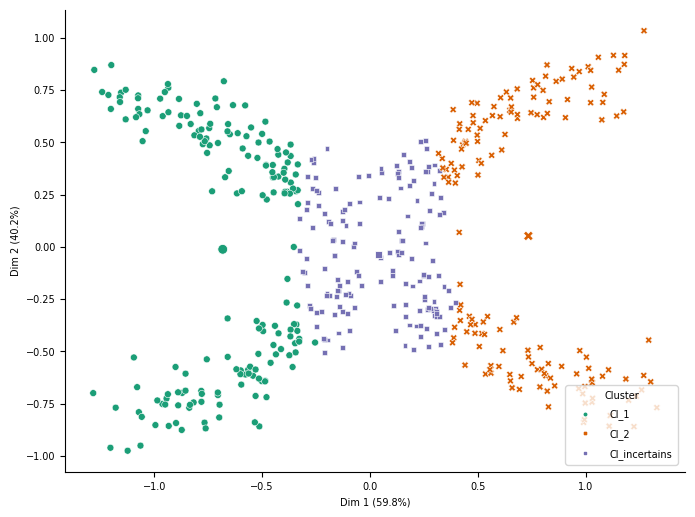

In [4]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [236]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-10)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [32.60793103429431, 32.607931034299924, 32.607931034304244, 32.60793103431156, 32.6079310343187, 32.60793103432014, 32.6079310343238, 32.60793103432432, 32.60793103432587, 32.60793103433254]
ARI values: [0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122]
NMI values: [0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111]


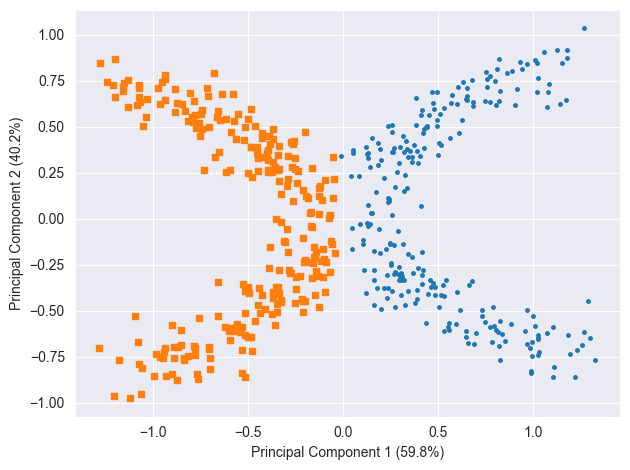

In [237]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [204]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=1.85, verbose=True)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [66.65361729471537, 66.65361729471537]
ARI values: [0.9760961032975123, 0.9760961032975123]
NMI values: [0.9530566686527555, 0.9530566686527555]


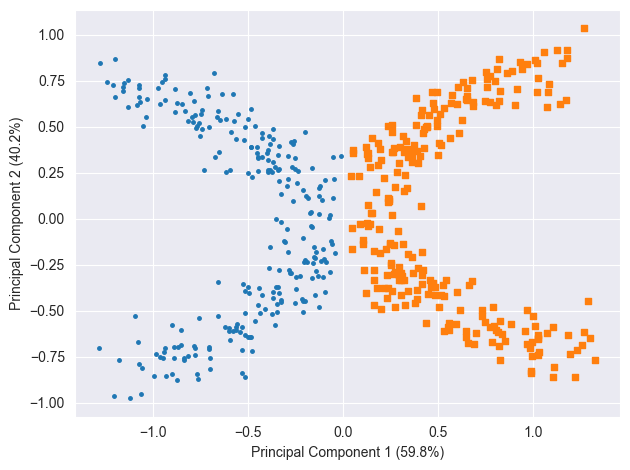

In [205]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [210]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, epsilon=1e-6)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [218.78496932569485, 218.78496932569485, 218.78496932569485, 218.78496932569485, 218.78496932569485, 218.78496932569485, 218.78496932569485, 218.78496989727515, 218.78496989727515, 218.78496989727515]
ARI values: [0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123, 0.9760961032975123]
NMI values: [0.9530566686527554, 0.9530566686527555, 0.9530566686527554, 0.9530566686527554, 0.9530566686527555, 0.9530566686527554, 0.9530566686527554, 0.9530566686527554, 0.9530566686527554, 0.9530566686527554]


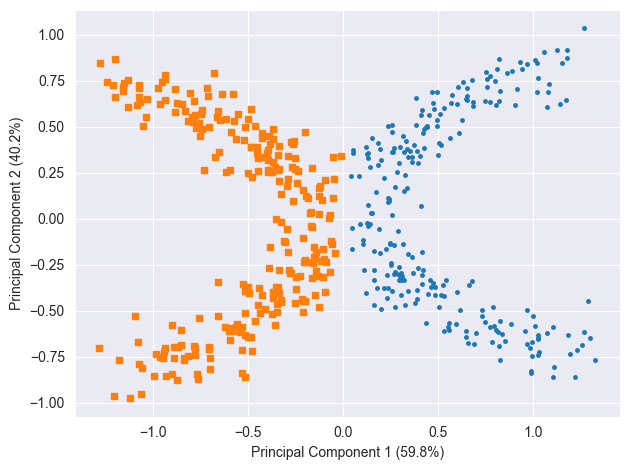

In [211]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [212]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, epsilon=1e-6)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [33.274132405036084, 33.27413241325617, 33.27413241325617, 33.27413241325617, 33.27413241325617, 33.27413241325617, 33.27413241325617, 33.27413241325617, 33.27413241325617, 33.27413241325617]
ARI values: [0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122, 0.9840320020521122]
NMI values: [0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111, 0.9663653678534111]


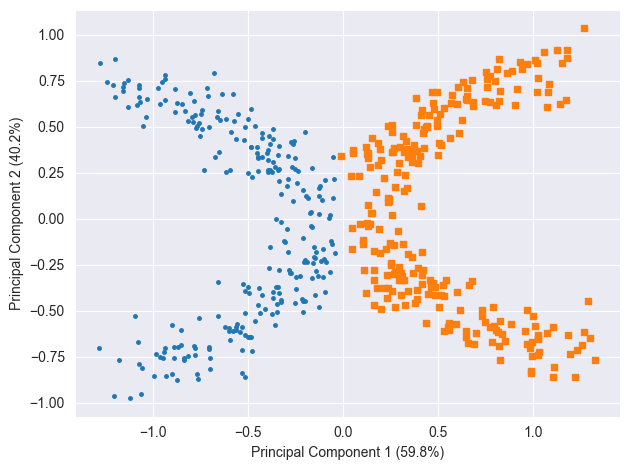

In [213]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [238]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, epsilon=1e-9)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [20.812478230948486, 20.812478230948486, 20.812478230948486, 20.812478230948486, 20.812478230948486, 20.812478230948486, 20.812478230948486, 20.812478230963343, 20.812478230963343, 20.812478230963343]
ARI values: [-0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567]
NMI values: [0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706]


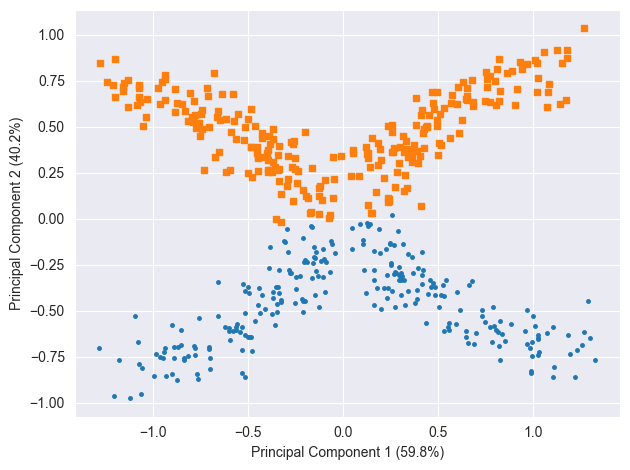

In [239]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [240]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-9)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [27.710745949881087, 27.710745949881087, 27.710745949881087, 27.710745950241346, 27.710745950241346, 27.710745950241346, 27.710745950241346, 27.710745950241346, 27.710745950241346, 27.710745950241346]
ARI values: [-0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567, -0.0017515180722891567]
NMI values: [0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706, 0.00018467284507950706]


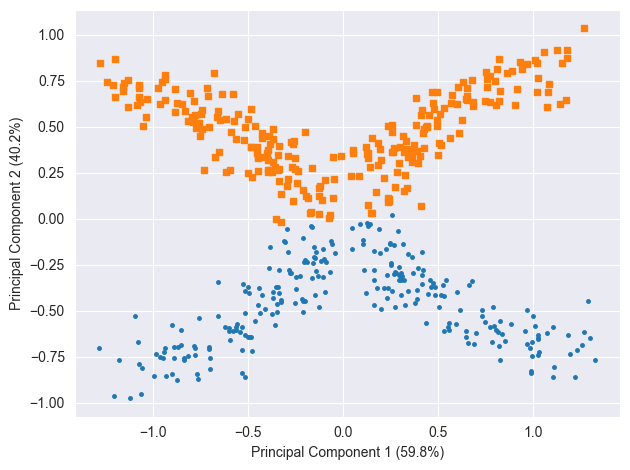

In [241]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)